Cleaning The Dataset

In [12]:
import tensorflow as tf
import os
import cv2
import imghdr

DatasetDir = r'D:\Laptop\E Drive\Sem 8\DMW\Brain Stroke\archive\Brain_Stroke_CT-SCAN_image'



In [9]:
from tensorflow.keras.utils import image_dataset_from_directory


In [13]:
IMG_SIZE = (224, 224)
BATCH_SIZE = 32

train_ds = image_dataset_from_directory(
    os.path.join(DatasetDir, "Train"),
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE
)

val_ds = image_dataset_from_directory(
    os.path.join(DatasetDir, "Validation"),
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE
)

test_ds = image_dataset_from_directory(
    os.path.join(DatasetDir, "Test"),
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE
)


Found 1843 files belonging to 2 classes.
Found 235 files belonging to 2 classes.
Found 437 files belonging to 2 classes.


In [14]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.prefetch(buffer_size=AUTOTUNE)


Found 1843 files belonging to 2 classes.
Found 437 files belonging to 2 classes.
Found 235 files belonging to 2 classes.


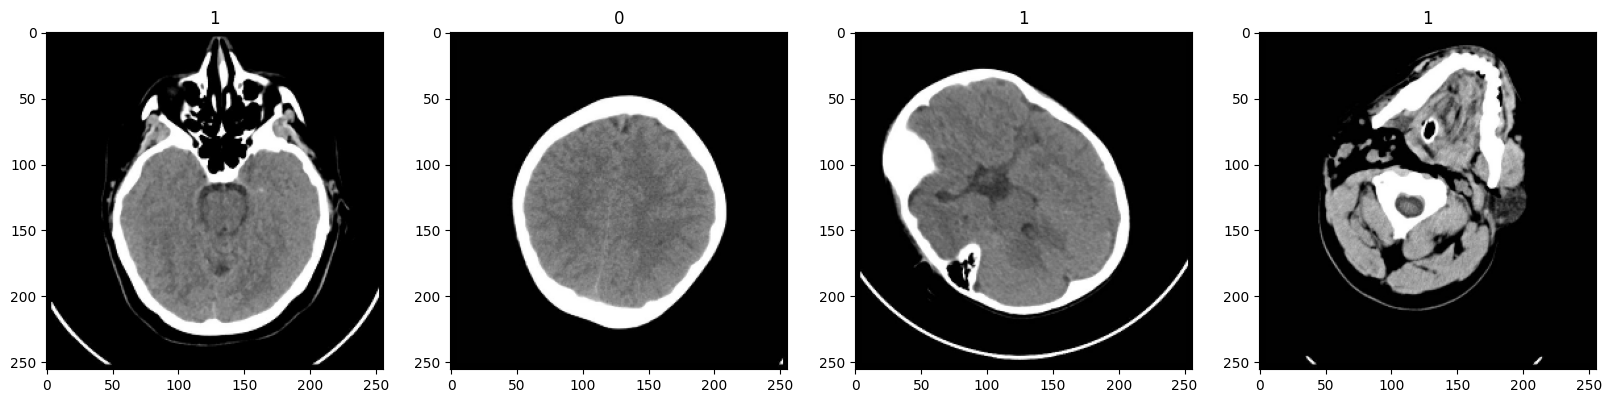

In [21]:
import os
dataset_dir = r'D:\Laptop\E Drive\Sem 8\DMW\Brain Stroke\archive\Brain_Stroke_CT-SCAN_image'

TrainingData = tf.keras.utils.image_dataset_from_directory(
    os.path.join(dataset_dir, 'Train')
).map(lambda x, y: (x/255, y))

TestingData = tf.keras.utils.image_dataset_from_directory(
    os.path.join(dataset_dir, 'Test')
).map(lambda x, y: (x/255, y))

ValidationData = tf.keras.utils.image_dataset_from_directory(
    os.path.join(dataset_dir, 'Validation')
).map(lambda x, y: (x/255, y))

DataIterator = TrainingData.as_numpy_iterator()

Batch = DataIterator.next()

Fig, ax = plt.subplots(ncols=4, figsize=(20,20))

for idx, img in enumerate(Batch[0][:4]):
    ax[idx].imshow(img.astype(float))
    ax[idx].title.set_text(Batch[1][idx])

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

Model = Sequential()

Model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
Model.add(MaxPooling2D())
Model.add(Conv2D(32, (3,3), 1, activation='relu'))
Model.add(MaxPooling2D())
Model.add(Conv2D(16, (3,3), 1, activation='relu'))
Model.add(MaxPooling2D())
Model.add(Flatten())
Model.add(Dense(256, activation='relu'))
Model.add(Dense(1, activation='sigmoid'))

Model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

Model.summary()

c:\Users\ankit\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 14400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     3,686,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

Training the Model

In [23]:
LogDir='logs'
Tensorboard_Callback = tf.keras.callbacks.TensorBoard(log_dir=LogDir)
History = Model.fit(TrainingData, epochs=20, validation_data=ValidationData, callbacks=[Tensorboard_Callback])

Epoch 1/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 25s 390ms/step - accuracy: 0.6281 - loss: 0.6385 - val_accuracy: 0.8170 - val_loss: 0.4632
Epoch 2/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 21s 357ms/step - accuracy: 0.8549 - loss: 0.3438 - val_accuracy: 0.9149 - val_loss: 0.2186
Epoch 3/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 33s 565ms/step - accuracy: 0.9371 - loss: 0.1587 - val_accuracy: 0.9447 - val_loss: 0.1265
Epoch 4/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 25s 423ms/step - accuracy: 0.9685 - loss: 0.0864 - val_accuracy: 0.9447 - val_loss: 0.1669
Epoch 5/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 24s 401ms/step - accuracy: 0.9851 - loss: 0.0438 - val_accuracy: 0.9745 - val_loss: 0.0555
Epoch 6/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 25s 431ms/step - accuracy: 0.9895 - loss: 0.0274 - val_accuracy: 0.9617 - val_loss: 0.1021
Epoch 7/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 25s 424ms/step - accuracy: 0.9987 - loss: 0.0104 - val_accuracy: 0.9830 - val_loss: 0.0686
Epoch 8/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 25s 429ms/step - accuracy: 0.9930 - loss: 0.0236 - val_accu

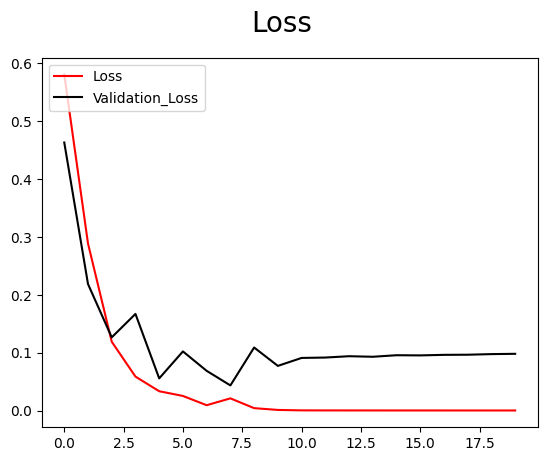

In [24]:
Fig = plt.figure()
plt.plot(History.history['loss'], color='red', label='Loss')
plt.plot(History.history['val_loss'], color='black', label='Validation_Loss')
Fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

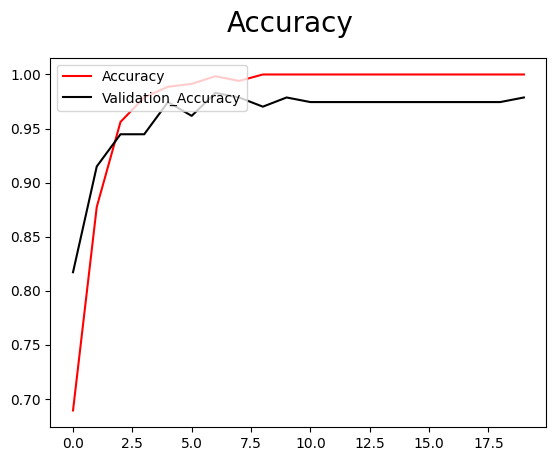

In [25]:
Fig = plt.figure()
plt.plot(History.history['accuracy'], color='red', label='Accuracy')
plt.plot(History.history['val_accuracy'], color='black', label='Validation_Accuracy')
Fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 512ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step
Confusion Matrix:
[[126.   4.]
 [ 18. 289.]]


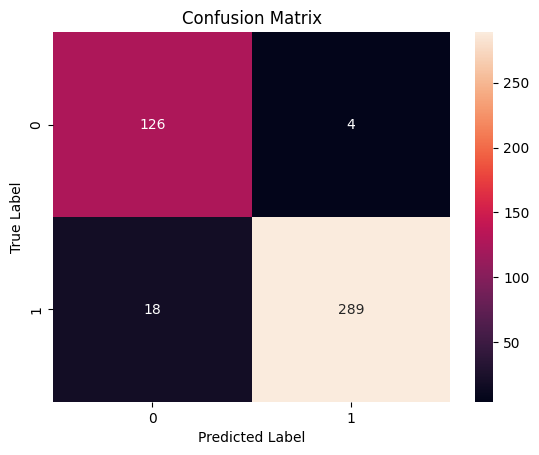

In [28]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize metrics
Precision = Precision()
Recall = Recall()
Accuracy = BinaryAccuracy()

# Initialize confusion matrix (assuming binary classification)
cm = np.zeros((2, 2))  # Adjust dimensions for multi-class problems

for Batch in TestingData.as_numpy_iterator():
  X, y = Batch
  yhat = Model.predict(X)

  # Update metrics
  Precision.update_state(y, yhat)
  Recall.update_state(y, yhat)
  Accuracy.update_state(y, yhat)

  # Calculate and accumulate confusion matrix
  cm += confusion_matrix(y, yhat.round())  # Round predictions for binary classes

# After iterating through all batches:

# Get final values for metrics
precision = Precision.result().numpy()
recall = Recall.result().numpy()
accuracy = Accuracy.result().numpy()

# Print or visualize the confusion matrix
print("Confusion Matrix:")
print(cm)

# Assuming you have class labels for your data
class_labels = ["Normal", "Stroke"]  # Adjust labels accordingly

# Get integer values for counts in the confusion matrix
cm_int = cm.astype(int)  # Convert to integer type

# Create a heatmap with integer annotations
sns.heatmap(cm_int, annot=True, fmt="d")  # Use 'd' format for integers
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [29]:
print(f"Precision : {Precision.result()}, Recall : {Recall.result()}, Accuracy : {Accuracy.result()}")

Precision : 0.9863481521606445, Recall : 0.9413681030273438, Accuracy : 0.9496567249298096


Testing the Model

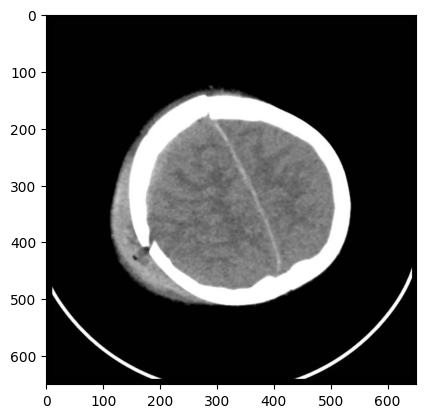

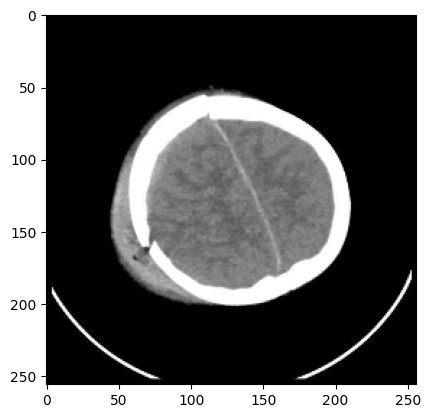

In [32]:
import cv2

Img = cv2.imread(r'D:\Laptop\E Drive\Sem 8\DMW\Brain Stroke\archive\Brain_Stroke_CT-SCAN_image\Test\ischaemic/51 (42).jpg')
plt.imshow(Img)
plt.show()

ResizedImg = tf.image.resize(Img, (256,256))
plt.imshow(ResizedImg.numpy().astype(int))
plt.show()

In [33]:
yhat = Model.predict(np.expand_dims(ResizedImg/255, 0))

print(yhat)

if yhat > 0.5: 
    print(f'Predicted class is Stroke')
else:
    print(f'Predicted class is Normal')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
[[1.]]
Predicted class is Stroke


In [45]:
Img = cv2.imread(r'D:\Laptop\E Drive\Sem 8\DMW\Brain Stroke\archive (1)\Brain_Stroke_CT-SCAN_image\Train\Stroke\2 (98).png')


In [40]:
import os

folder_path = r'D:\Laptop\E Drive\Sem 8\DMW\Brain Stroke\archive (1)\Brain_Stroke_CT-SCAN_image\Train\Stroke'
image_files = os.listdir(folder_path)
print(image_files)


['2 (1).JPG', '2 (1).png', '2 (10).JPG', '2 (10).png', '2 (100).JPG', '2 (100).png', '2 (1000).png', '2 (1001).png', '2 (1002).png', '2 (1003).png', '2 (1005).png', '2 (1006).png', '2 (1007).png', '2 (1008).png', '2 (1009).png', '2 (101).JPG', '2 (101).png', '2 (1010).png', '2 (1011).png', '2 (1012).png', '2 (102).JPG', '2 (102).png', '2 (103).png', '2 (104).JPG', '2 (104).png', '2 (105).JPG', '2 (105).png', '2 (106).JPG', '2 (106).png', '2 (107).png', '2 (108).JPG', '2 (108).png', '2 (109).JPG', '2 (109).png', '2 (11).JPG', '2 (11).png', '2 (110).JPG', '2 (110).png', '2 (111).JPG', '2 (111).png', '2 (113).JPG', '2 (113).png', '2 (114).JPG', '2 (114).png', '2 (115).png', '2 (116).png', '2 (117).JPG', '2 (118).JPG', '2 (119).JPG', '2 (12).png', '2 (120).JPG', '2 (120).png', '2 (121).png', '2 (122).JPG', '2 (122).png', '2 (123).JPG', '2 (123).png', '2 (124).JPG', '2 (125).JPG', '2 (125).png', '2 (126).JPG', '2 (126).png', '2 (127).JPG', '2 (128).JPG', '2 (129).JPG', '2 (129).png', '2 (13

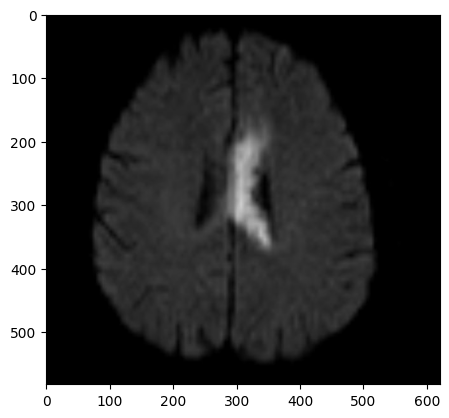

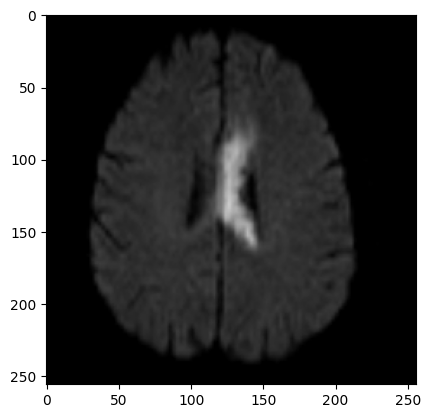

In [46]:
import cv2

Img = cv2.imread(r'D:\Laptop\E Drive\Sem 8\DMW\Brain Stroke\archive (1)\Brain_Stroke_CT-SCAN_image\Train\Stroke\2 (98).JPG')
plt.imshow(Img)
plt.show()

ResizedImg = tf.image.resize(Img, (256,256))
plt.imshow(ResizedImg.numpy().astype(int))
plt.show()

In [47]:
yhat = Model.predict(np.expand_dims(ResizedImg/255, 0))
print(yhat)
if yhat > 0.5: 
    print(f'Predicted class is Stroke')
else:
    print(f'Predicted class is Normal')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
[[0.1353055]]
Predicted class is Normal


Saving the Model

In [51]:
from tensorflow.keras.models import load_model

Model.save('ShallowBrainStrokeClassifier.keras')